<a href="https://colab.research.google.com/github/AlejandroPhD/ARIMA/blob/main/Portfolio_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns; sns.set_theme()
import avs_risk_kit2 as ark

In [4]:
r=pd.read_excel('mercado.xlsx')
r.head()

,Fecha,BBB,BLP,CUP,DPF,LRS,PGS,VTD,BTS,PGB
0,31/01/2018,0.003458,0.003742,0.000617,0.002608,0.000300,0.004167,0.003833,0.002342,0.004258
1,28/02/2018,0.003617,0.002925,0.000617,0.002742,0.001075,0.004167,0.003575,0.002342,0.004258
2,31/03/2018,0.004225,0.003925,0.000600,0.002817,0.000050,0.005717,0.003092,0.003142,0.004258
3,30/04/2018,0.003350,0.003575,0.000642,0.002975,0.001075,0.005717,0.002500,0.003333,0.004258
4,31/05/2018,0.003525,0.003558,0.001342,0.002775,0.001075,0.005717,0.002558,0.002342,0.004258


In [5]:
r=r.set_index(r.columns[0])
r.head()

,BBB,BLP,CUP,DPF,LRS,PGS,VTD,BTS,PGB
Fecha,,,,,,,,,
31/01/2018,0.003458,0.003742,0.000617,0.002608,0.000300,0.004167,0.003833,0.002342,0.004258
28/02/2018,0.003617,0.002925,0.000617,0.002742,0.001075,0.004167,0.003575,0.002342,0.004258
31/03/2018,0.004225,0.003925,0.000600,0.002817,0.000050,0.005717,0.003092,0.003142,0.004258
30/04/2018,0.003350,0.003575,0.000642,0.002975,0.001075,0.005717,0.002500,0.003333,0.004258
31/05/2018,0.003525,0.003558,0.001342,0.002775,0.001075,0.005717,0.002558,0.002342,0.004258


In [6]:
er = ark.annualize_rets(r, 12)
er

BBB    0.046086
BLP    0.048869
CUP    0.012664
DPF    0.034938
LRS    0.012986
PGS    0.070786
VTD    0.059531
BTS    0.028452
PGB    0.052329
dtype: float64

In [7]:
cov = r.cov()*12
cov

,BBB,BLP,CUP,DPF,LRS,PGS,VTD,BTS,PGB
BBB,2.682145e-06,9.295961e-07,1.219535e-07,3.404287e-07,2.494578e-06,3.646254e-07,4.708343e-06,-1.038396e-07,5.178219e-07
BLP,9.295961e-07,3.340541e-06,2.475677e-07,5.607902e-07,1.743693e-06,5.437515e-07,4.973529e-06,-4.423544e-07,1.057229e-07
CUP,1.219535e-07,2.475677e-07,3.515157e-06,7.386267e-08,1.061553e-07,3.732772e-07,6.741570e-07,4.398522e-08,9.592954e-08
DPF,3.404287e-07,5.607902e-07,7.386267e-08,6.046203e-07,1.091941e-06,2.228779e-07,4.502396e-07,-6.791923e-08,3.543386e-08
LRS,2.494578e-06,1.743693e-06,1.061553e-07,1.091941e-06,1.592358e-05,8.678761e-07,-1.927927e-07,3.109753e-07,2.333548e-06
PGS,3.646254e-07,5.437515e-07,3.732772e-07,2.228779e-07,8.678761e-07,2.363138e-06,-8.148718e-07,1.059921e-08,2.283088e-07
VTD,4.708343e-06,4.973529e-06,6.741570e-07,4.502396e-07,-1.927927e-07,-8.148718e-07,7.996334e-05,-9.654185e-07,1.116300e-06
BTS,-1.038396e-07,-4.423544e-07,4.398522e-08,-6.791923e-08,3.109753e-07,1.059921e-08,-9.654185e-07,1.191531e-06,8.773851e-08
PGB,5.178219e-07,1.057229e-07,9.592954e-08,3.543386e-08,2.333548e-06,2.283088e-07,1.116300e-06,8.773851e-08,1.057942e-06


In [8]:
corr = r.corr()

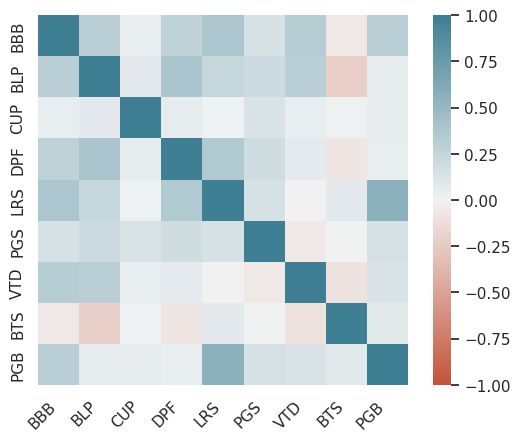

In [9]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
r.describe()

,BBB,BLP,CUP,DPF,LRS,PGS,VTD,BTS,PGB
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.003762,0.003984,0.001049,0.002866,0.001076,0.005716,0.004834,0.002341,0.004260
std,0.000473,0.000528,0.000541,0.000224,0.001152,0.000444,0.002581,0.000315,0.000297
min,0.002550,0.002650,-0.000408,0.002258,-0.000833,0.004167,0.002500,0.001208,0.003425
25%,0.003502,0.003646,0.000698,0.002742,0.000346,0.005717,0.004025,0.002342,0.004258
50%,0.003754,0.004067,0.001050,0.002867,0.001075,0.005717,0.004529,0.002342,0.004258
75%,0.004083,0.004360,0.001356,0.002992,0.001075,0.005717,0.004852,0.002342,0.004258
max,0.004642,0.004992,0.002067,0.003458,0.005025,0.007500,0.019033,0.003333,0.005167


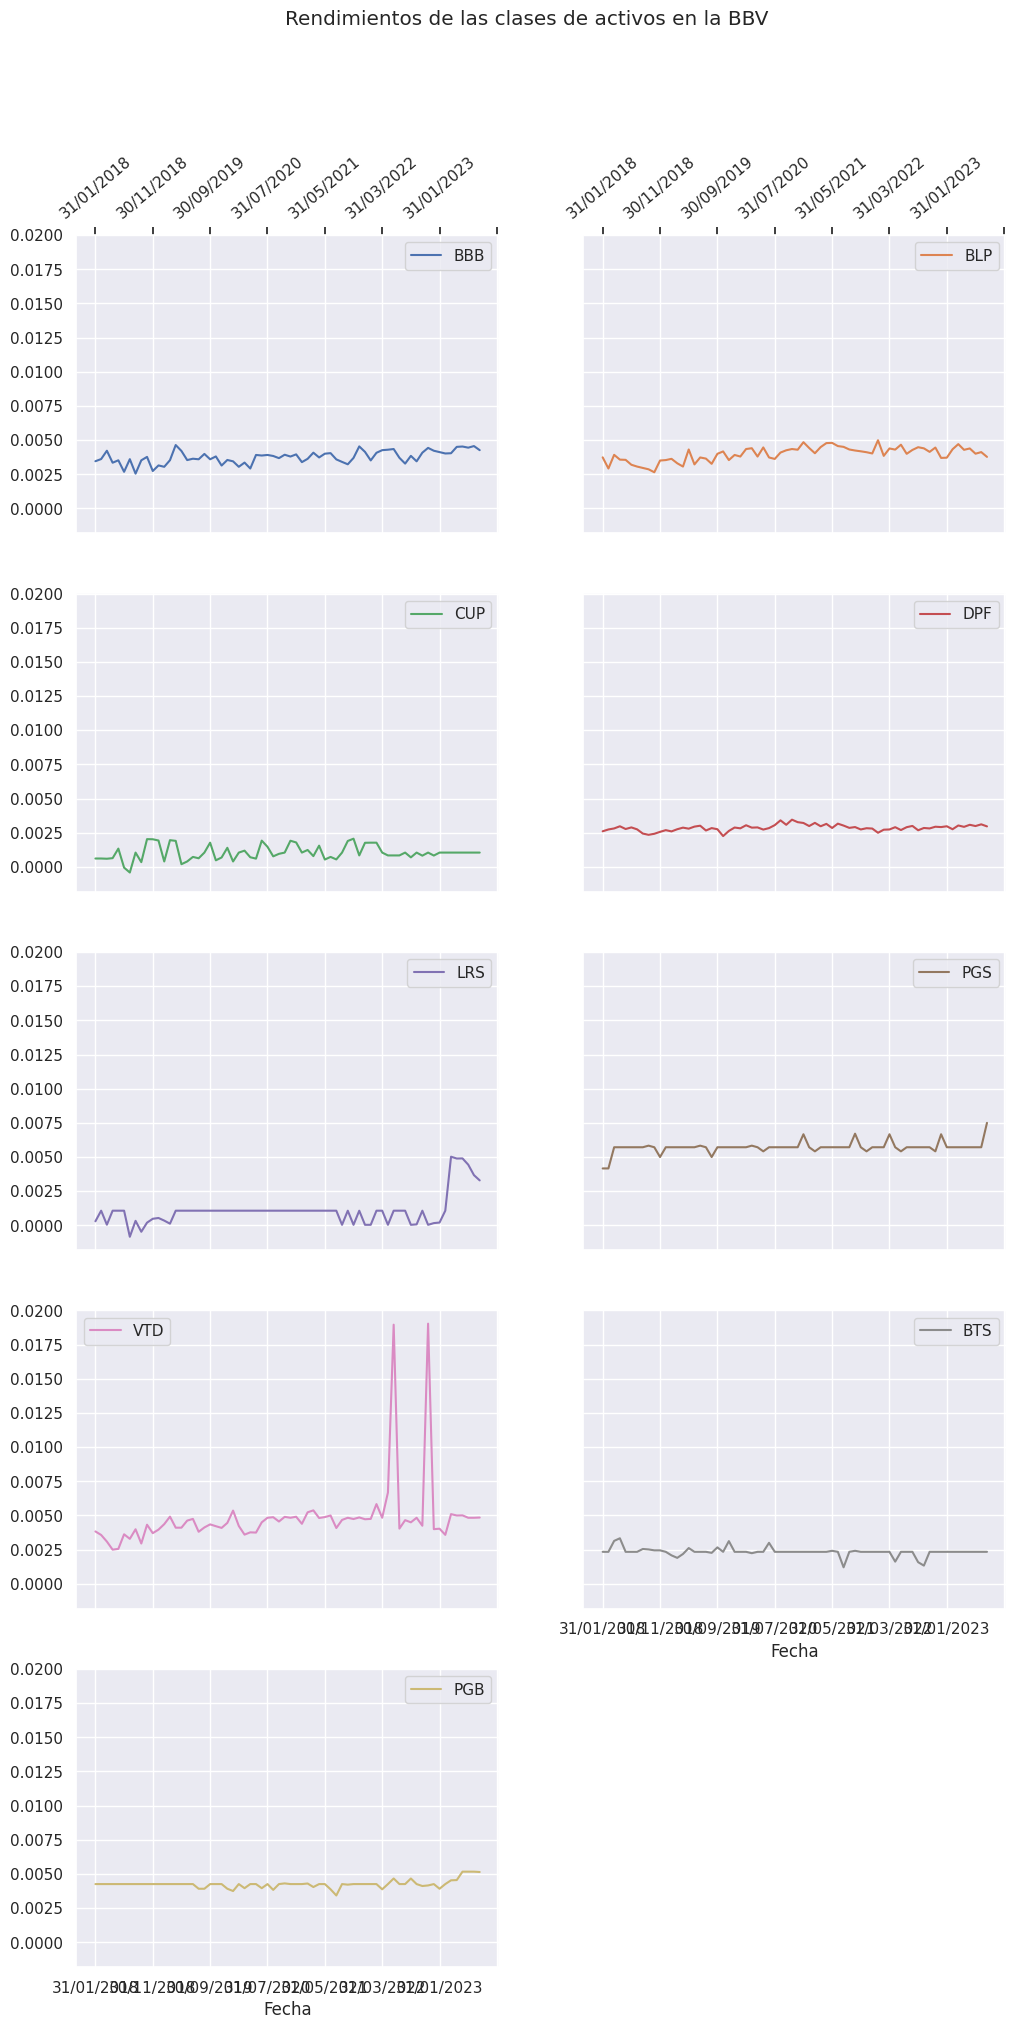

In [11]:
# Plot return for each asset class
lo_col = 2
lo_row = int(np.ceil(len(r.columns)/2))
f_hei = lo_row * 4.5
f_wid = lo_col * 6
ax = (r).plot(subplots=True, layout=(lo_row, lo_col), figsize=(f_wid, f_hei),
                             logy=False, sharex=True, sharey=True,
                             title='Rendimientos de las clases de activos en la BBV');
for i in range(lo_col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
plt.show()

In [12]:
er = ark.annualize_rets(r, 12)
er

BBB    0.046086
BLP    0.048869
CUP    0.012664
DPF    0.034938
LRS    0.012986
PGS    0.070786
VTD    0.059531
BTS    0.028452
PGB    0.052329
dtype: float64

In [13]:
rf=0.01

In [14]:
ark.annualize_vol(r,12)

BBB    0.001638
BLP    0.001828
CUP    0.001875
DPF    0.000778
LRS    0.003990
PGS    0.001537
VTD    0.008942
BTS    0.001092
PGB    0.001029
dtype: float64

In [15]:
ark.sharpe_ratio(r, rf, 12)

BBB    21.834187
BLP    21.073527
CUP     1.407905
DPF    31.780896
LRS     0.741615
PGS    39.184105
VTD     5.488764
BTS    16.750751
PGB    40.780339
dtype: float64

In [16]:
ark.is_normal(r)

BBB     True
BLP     True
CUP     True
DPF     True
LRS    False
PGS    False
VTD    False
BTS    False
PGB    False
dtype: bool

In [17]:
ark.summary_stats(r, riskfree_rate=rf)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BBB,0.046086,0.001638,-0.304982,2.788382,-0.002948,-0.002725,21.834187,0.000000
BLP,0.048869,0.001828,-0.492296,2.650623,-0.003048,-0.002852,21.073527,0.000000
CUP,0.012664,0.001875,0.166406,2.779908,-0.000189,-0.000023,1.407905,-0.000458
DPF,0.034938,0.000778,-0.052231,3.703296,-0.002499,-0.002369,31.780896,0.000000
LRS,0.012986,0.003990,2.109682,7.738415,-0.000086,0.000112,0.741615,-0.000967
PGS,0.070786,0.001537,0.161499,10.015479,-0.005074,-0.004583,39.184105,0.000000
VTD,0.059531,0.008942,4.920479,27.487426,-0.006634,-0.002775,5.488764,0.000000
BTS,0.028452,0.001092,-0.503737,8.109624,-0.001815,-0.001437,16.750751,0.000000
PGB,0.052329,0.001029,1.131994,6.642295,-0.003898,-0.003752,40.780339,0.000000


In [18]:
ark.optimal_weights(10, er, cov)

[array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.71655466e-11,
        1.36642688e-11, 8.25197194e-11, 0.00000000e+00, 0.00000000e+00,
        2.69117858e-11]),
 array([0.00000000e+00, 7.95672697e-19, 5.38103562e-01, 1.00160245e-01,
        9.59630769e-02, 2.36087118e-19, 3.29484386e-19, 2.65773116e-01,
        0.00000000e+00]),
 array([4.81344161e-02, 3.85955413e-02, 3.72548131e-01, 2.12102968e-01,
        2.21251150e-02, 3.25260652e-19, 0.00000000e+00, 2.92277625e-01,
        1.42162036e-02]),
 array([8.66940108e-02, 8.25660931e-02, 2.62687060e-01, 2.00189718e-01,
        5.55111512e-17, 2.27868487e-02, 6.28837260e-18, 2.50602151e-01,
        9.44741191e-02]),
 array([0.10626429, 0.10481943, 0.17663791, 0.17251924, 0.        ,
        0.10637979, 0.        , 0.19950759, 0.13387176]),
 array([0.12703145, 0.13027557, 0.09300975, 0.14361001, 0.        ,
        0.1920915 , 0.        , 0.1461542 , 0.16782753]),
 array([1.48226129e-01, 1.59436852e-01, 9.72714482e-03, 1.15520139e-

<Axes: xlabel='Volatility'>

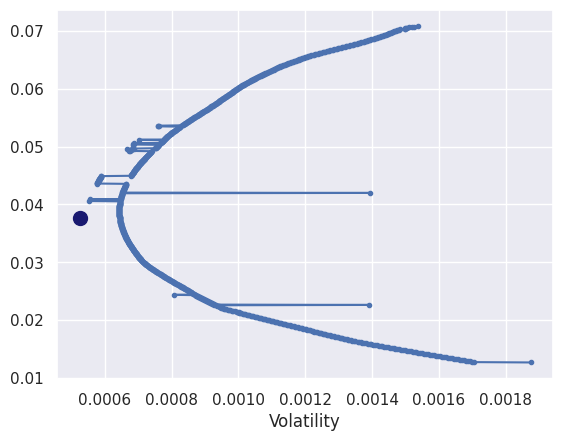

In [19]:
ark.plot_ef(1000, er, cov, legend=False, show_cml=False, riskfree_rate=rf, show_ew=False, show_gmv=True)

In [20]:
clases_activos = ['BBB', 'BLP', 'CUP', 'DPF', 'LRS', 'PGS', 'VTD', 'BTS', 'PGB']

In [22]:
#Máximo ratio de sharpe sin restricciones
sr=ark.msr(rf, er, cov)
sr
sr_df=round(pd.DataFrame(sr),4)*100
sr=(sr_df.T)
sr.columns=clases_activos
sr

,BBB,BLP,CUP,DPF,LRS,PGS,VTD,BTS,PGB
0,0.0,4.43,0.0,29.21,0.0,18.12,0.09,15.93,32.21


In [23]:
max_sr_rts=(ark.msr(rf, er, cov))*r
sum_return=max_sr_rts.sum(axis=1)
market_rts=pd.DataFrame(sum_return)
market_rts.columns=['UPB_Index']
market_rts

,UPB_Index
Fecha,
31/01/2018,0.003431
28/02/2018,0.003434
31/03/2018,0.003908
30/04/2018,0.003969
31/05/2018,0.003751
...,...
30/04/2023,0.003926
31/05/2023,0.004173
30/06/2023,0.004129


In [24]:
ark.summary_stats(market_rts, riskfree_rate=rf)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
UPB_Index,0.046553,0.000597,0.671277,5.067832,-0.003559,-0.003448,60.635206,0.0
